In [33]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt


In [44]:
def create_df(file_name): 
    og_df = pd.read_csv(file_name)
    adv_totals = []
    adv_toward = []
    adv_away = []
    for loss in og_df['losses']: 
        loss = f"\"{loss}\""
        parsed_loss = json.loads(loss)
        parsed_loss = parsed_loss.replace("'", '"')
        parsed_loss = parsed_loss.replace('nan', 'null')
        parsed_loss = json.loads(parsed_loss)
        adv_totals.append(parsed_loss["adv_total"])
        adv_toward.append(parsed_loss['adv_toward'])
        adv_away.append(parsed_loss['adv_away'])

    df = pd.DataFrame(columns=['Epoch', 'Adv Totals', 'Adv Toward', 'Adv Away'])
    df['Epoch'] = list(range(100))
    df['Adv Totals'] = adv_totals
    df['Adv Toward'] = adv_toward
    df['Adv Away'] = adv_away

    df = df.dropna()
    return df

In [50]:
def create_df_defense(file_name):
    og_df = pd.read_csv(file_name)
    adv_totals = []
    adv_toward = []
    adv_away = []
    def_toward = []
    def_away = []
    def_total = []
    def_sft = []
    for loss in og_df['losses']: 
        loss = f"\"{loss}\""
        parsed_loss = json.loads(loss)
        parsed_loss = parsed_loss.replace("'", '"')
        parsed_loss = parsed_loss.replace('nan', 'null')
        parsed_loss = json.loads(parsed_loss)
        adv_totals.append(parsed_loss["adv_total"])
        adv_toward.append(parsed_loss['adv_toward'])
        adv_away.append(parsed_loss['adv_away'])
        def_toward.append(parsed_loss['def_toward'])
        def_away.append(parsed_loss['def_away'])
        def_total.append(parsed_loss['def_total'])
        def_sft.append(parsed_loss['def_sft'])

    df = pd.DataFrame(columns=['Epoch', 'Adv Totals', 'Adv Toward', 'Adv Away'])
    df['Epoch'] = list(range(100))
    df['Adv Totals'] = adv_totals
    df['Adv Toward'] = adv_toward
    df['Adv Away'] = adv_away
    df['Def Toward'] = def_toward
    df['Def Away'] = def_away
    df['Def Total'] = def_total
    df['Def SFT'] = def_sft

    df = df.dropna()
    return df

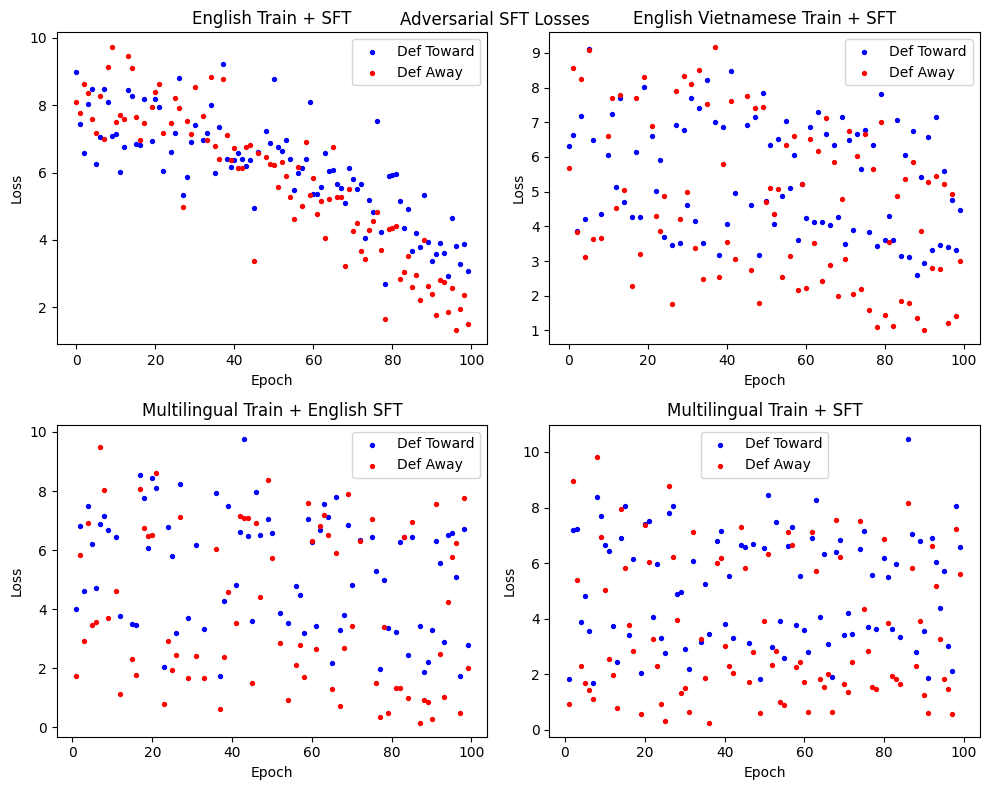

In [55]:
file_to_title_def = {
    'en_def_losses.csv' : 'English Train + SFT', 
    'en_vi_def_losses.csv' : 'English Vietnamese Train + SFT', 
    'multi_en_def_losses.csv' : 'Multilingual Train + English SFT', 
    'multi_train_sft_def_losses.csv' : 'Multilingual Train + SFT'
}
def create_scatter_figure(filenames):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()

    for i, file in enumerate(filenames): 
        df = create_df_defense(file)
        x = df['Epoch']
        y1 = df['Def Toward']
        y2 = df['Def Away']
        # y3 = df['Def SFT']

        axes[i].scatter(x, y1, c='blue', label='Def Toward', s=8)
        axes[i].scatter(x, y2, c='red', label='Def Away', s=8)
        # axes[i].scatter(x, y3, c='orange', label='Def SFT', s=4)
        axes[i].set_title(file_to_title_def[file])
        axes[i].set_xlabel('Epoch')
        axes[i].set_ylabel('Loss')
        axes[i].legend()

   
    plt.tight_layout()
    # plt.show()
    plt.suptitle('Adversarial SFT Losses')
    plt.savefig('Adversarial SFT Losses.png')

create_scatter_figure(list(file_to_title_def.keys()))




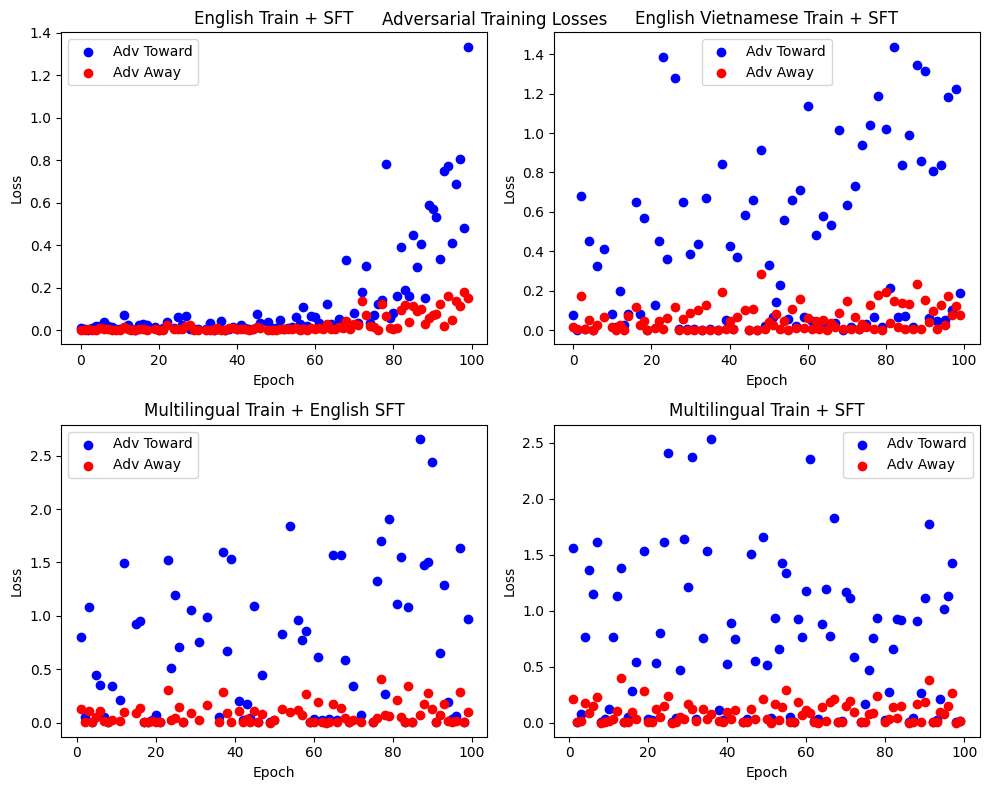

In [49]:
file_to_title = {
    'en_adv_losses.csv' : 'English Train + SFT', 
    'en_vi_adv_losses.csv' : 'English Vietnamese Train + SFT', 
    'multi_en_adv_losses.csv' : 'Multilingual Train + English SFT', 
    'multi_train_sft_adv_loss.csv' : 'Multilingual Train + SFT'
}
def create_scatter_figure(filenames):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()

    for i, file in enumerate(filenames): 
        df = create_df(file)
        x = df['Epoch']
        y1 = df['Adv Toward']
        y2 = df['Adv Away']

        axes[i].scatter(x, y1, c='blue', label='Adv Toward')
        axes[i].scatter(x, y2, c='red', label='Adv Away')
        axes[i].set_title(file_to_title[file])
        axes[i].set_xlabel('Epoch')
        axes[i].set_ylabel('Loss')
        axes[i].legend()

   
    plt.tight_layout()
    # plt.show()
    plt.suptitle('Adversarial Training Losses')
    plt.savefig('Adversarial Training Losses.png')

create_scatter_figure(list(file_to_title.keys()))




In [2]:
df = pd.read_csv('en_adv_losses.csv')

In [24]:
adv_totals = []
adv_toward = []
adv_away = []
for loss in df['losses']: 
    loss = f"\"{loss}\""
    parsed_loss = json.loads(loss)
    parsed_loss = parsed_loss.replace("'", '"')
    parsed_loss = parsed_loss.replace('nan', 'null')
    parsed_loss = json.loads(parsed_loss)
    adv_totals.append(parsed_loss["adv_total"])
    adv_toward.append(parsed_loss['adv_toward'])
    adv_away.append(parsed_loss['adv_away'])

In [25]:
df = pd.DataFrame(columns=['Epoch', 'Adv Totals', 'Adv Toward', 'Adv Away'])
df['Epoch'] = list(range(100))
df['Adv Totals'] = adv_totals
df['Adv Toward'] = adv_toward
df['Adv Away'] = adv_away

df = df.dropna()

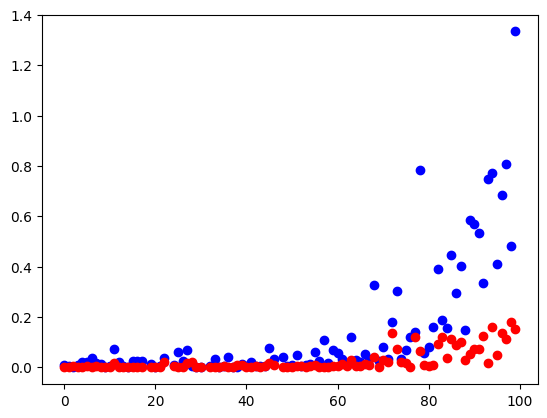

In [39]:
plt.scatter(df['Epoch'], df['Adv Toward'], color='blue')
# slope, intercept = np.polyfit(df['Epoch'], df['Adv Toward'], 1)
# y_fit = slope * df['Epoch'] + intercept
# plt.plot(df['Epoch'], y_fit)

# slope, intercept = np.polyfit(df['Epoch'], df['Adv Away'], 1)
# y_fit = slope * df['Epoch'] + intercept
# plt.plot(df['Epoch'], y_fit)
plt.scatter(df['Epoch'], df['Adv Away'], color='red')

# plt.plot(df['Epoch'], df['Adv Toward'], color='blue')
# plt.plot(df['Epoch'], df['Adv Away'], color='red')